In [1]:

#Twitter Sentimental Analysis

In [2]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 6.8 MB/s 


In [3]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [6]:
tweets_list = []
maxTweets = 1000
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('crypto since:2020-01-01 until:{today}').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.content])


In [7]:
tweets_list

[['@ASvanevik bro… thank you!!!! I use your services daily never bother to look up who built nansen until today. You made my list of 2,023 people to follow in crypto. 🙏 \n\nAlso, can I borrow your intern?'],
 ['If you want to preserve wealth in the long run, don’t ever use cryptos, I used to be a crypto maximalist from 2018 until today, I lost it all on my @Trezor wallet, just threw the device to the garbage…'],
 ['So $GYOZA does a 7x in about a week, never dips until today. We get a small 30% dip which is gone in a few hours. \n\nDo with this what you will. \n\n#Crypto #altcoin #FinancialFreedom'],
 ["@nounity @goldengateblond Crypto currency so I'm not sure we will. I didn't even know what a crypto wallet was until today. No way his followers could have figured this one out so maybe Russia and the Saudis were in on this?"],
 ['Solana: This Minor Hiccup Didn’t Discourage Investors From Acquiring SOL – Until Today. Via NewsBTC - https://t.co/THOjR3xr0X #CryptocurrencyNews #cryptocurren

In [8]:
tweets_to_df = pd.DataFrame(tweets_list,columns=['Tweets'])
tweets_to_df

,Tweets
0,@ASvanevik bro… thank you!!!! I use your servi...
1,If you want to preserve wealth in the long run...
2,"So $GYOZA does a 7x in about a week, never dip..."
3,@nounity @goldengateblond Crypto currency so I...
4,Solana: This Minor Hiccup Didn’t Discourage In...
...,...
996,"LIVE: Until today, #bitcoin was a better inves..."
997,@WabisuNFTLover Well I was a stock investor / ...
998,Which #crypto is your biggest gainer until tod...
999,@moviefreakgirl I actually bought Doge today b...


In [9]:
tweets_to_df.head()

,Tweets
0,@ASvanevik bro… thank you!!!! I use your servi...
1,If you want to preserve wealth in the long run...
2,"So $GYOZA does a 7x in about a week, never dip..."
3,@nounity @goldengateblond Crypto currency so I...
4,Solana: This Minor Hiccup Didn’t Discourage In...


In [10]:
def cleanTweets(text):
  text= re.sub('@[A-Za-z0-9_]+','',text)  #remove @mentions
  text = re.sub('#','',text) #removes hastag '#' symbol
  text = re.sub('RT[\s]+','',text)
  text = re.sub('https?:\/\/\S+', '', text) 
  text = re.sub('\n',' ',text)
  return text


In [11]:
tweets_to_df['cleanedTweets']=tweets_to_df['Tweets'].apply(cleanTweets)

In [12]:
tweets_to_df

,Tweets,cleanedTweets
0,@ASvanevik bro… thank you!!!! I use your servi...,bro… thank you!!!! I use your services daily ...
1,If you want to preserve wealth in the long run...,If you want to preserve wealth in the long run...
2,"So $GYOZA does a 7x in about a week, never dip...","So $GYOZA does a 7x in about a week, never dip..."
3,@nounity @goldengateblond Crypto currency so I...,Crypto currency so I'm not sure we will. I d...
4,Solana: This Minor Hiccup Didn’t Discourage In...,Solana: This Minor Hiccup Didn’t Discourage In...
...,...,...
996,"LIVE: Until today, #bitcoin was a better inves...","LIVE: Until today, bitcoin was a better invest..."
997,@WabisuNFTLover Well I was a stock investor / ...,Well I was a stock investor / crypto investor...
998,Which #crypto is your biggest gainer until tod...,Which crypto is your biggest gainer until toda...
999,@moviefreakgirl I actually bought Doge today b...,I actually bought Doge today before it shot u...


In [13]:
tweets_to_df.to_csv('tweets_crypto.csv')

In [14]:
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0 )

In [15]:
#subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
#polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
  

In [16]:
savedTweets['subjectivity']=savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['polarity']=savedTweets['cleanedTweets'].apply(getPolarity)
savedTweets.drop('Tweets',axis=1)

,cleanedTweets,subjectivity,polarity
0,bro… thank you!!!! I use your services daily ...,0.000000,0.000000e+00
1,If you want to preserve wealth in the long run...,0.400000,-5.000000e-02
2,"So $GYOZA does a 7x in about a week, never dip...",0.250000,-2.250000e-01
3,Crypto currency so I'm not sure we will. I d...,0.888889,-2.500000e-01
4,Solana: This Minor Hiccup Didn’t Discourage In...,0.200000,-5.000000e-02
...,...,...,...
996,"LIVE: Until today, bitcoin was a better invest...",0.275000,1.022727e-01
997,Well I was a stock investor / crypto investor...,0.237500,1.250000e-02
998,Which crypto is your biggest gainer until toda...,0.000000,0.000000e+00
999,I actually bought Doge today before it shot u...,0.350000,3.500000e-01


In [17]:
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

In [18]:
savedTweets['Analysis']=savedTweets['polarity'].apply(getAnalysis)

In [19]:
savedTweets.head(10)

,Tweets,cleanedTweets,subjectivity,polarity,Analysis
0,@ASvanevik bro… thank you!!!! I use your servi...,bro… thank you!!!! I use your services daily ...,0.000000,0.000000,Neutral
1,If you want to preserve wealth in the long run...,If you want to preserve wealth in the long run...,0.400000,-0.050000,Negative
2,"So $GYOZA does a 7x in about a week, never dip...","So $GYOZA does a 7x in about a week, never dip...",0.250000,-0.225000,Negative
3,@nounity @goldengateblond Crypto currency so I...,Crypto currency so I'm not sure we will. I d...,0.888889,-0.250000,Negative
4,Solana: This Minor Hiccup Didn’t Discourage In...,Solana: This Minor Hiccup Didn’t Discourage In...,0.200000,-0.050000,Negative
5,Solana: This Minor Hiccup Didn’t Discourage In...,Solana: This Minor Hiccup Didn’t Discourage In...,0.200000,-0.050000,Negative
6,Solana: This Minor Hiccup Didn’t Discourage In...,Solana: This Minor Hiccup Didn’t Discourage In...,0.200000,-0.050000,Negative
7,(Solana: This Minor Hiccup Didn’t Discourage I...,(Solana: This Minor Hiccup Didn’t Discourage I...,0.464286,0.171429,Positive
8,"@aaron_rupar1 @atrupar This is a fake account,...","This is a fake account, they were tweeting c...",1.000000,-0.500000,Negative
9,@AltcoinDailyio Looks like the bear market con...,Looks like the bear market continues. I need ...,0.230909,0.187273,Positive


In [20]:
savedTweets['Analysis'].value_counts()

Positive    597
Neutral     211
Negative    193
Name: Analysis, dtype: int64

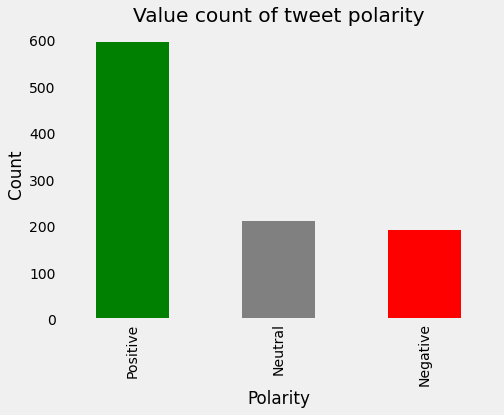

In [21]:
#plot bar
fig=plt.figure(figsize=(7,5))
color=['green','grey','red']
savedTweets['Analysis'].value_counts().plot(kind='bar',color=color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()


In [22]:
sentences = []
for word in savedTweets['cleanedTweets']:
  sentences.append(word)
sentences

[' bro… thank you!!!! I use your services daily never bother to look up who built nansen until today. You made my list of 2,023 people to follow in crypto. 🙏   Also, can I borrow your intern?',
 'If you want to preserve wealth in the long run, don’t ever use cryptos, I used to be a crypto maximalist from 2018 until today, I lost it all on my  wallet, just threw the device to the garbage…',
 'So $GYOZA does a 7x in about a week, never dips until today. We get a small 30% dip which is gone in a few hours.   Do with this what you will.   Crypto altcoin FinancialFreedom',
 "  Crypto currency so I'm not sure we will. I didn't even know what a crypto wallet was until today. No way his followers could have figured this one out so maybe Russia and the Saudis were in on this?",
 'Solana: This Minor Hiccup Didn’t Discourage Investors From Acquiring SOL – Until Today. Via NewsBTC -  CryptocurrencyNews cryptocurrency Crypto CryptoNews',
 'Solana: This Minor Hiccup Didn’t Discourage Investors From 

In [23]:
lines=list()
for line in sentences:
  words=line.split()
  for w in words:
    lines.append(w)
lines[:10]

['bro…',
 'thank',
 'you!!!!',
 'I',
 'use',
 'your',
 'services',
 'daily',
 'never',
 'bother']

In [24]:
stemmer=SnowballStemmer(language='english')
stem=[]
for word in lines:
  stem.append(stemmer.stem(word))
stem[:20]

['bro…',
 'thank',
 'you!!!!',
 'i',
 'use',
 'your',
 'servic',
 'daili',
 'never',
 'bother',
 'to',
 'look',
 'up',
 'who',
 'built',
 'nansen',
 'until',
 'today.',
 'you',
 'made']

In [25]:
stem2=[]
for word in stem:
  if word not in nlp.Defaults.stop_words:
    stem2.append(word)
stem2[:20]

['bro…',
 'thank',
 'you!!!!',
 'use',
 'servic',
 'daili',
 'bother',
 'look',
 'built',
 'nansen',
 'today.',
 'list',
 '2,023',
 'peopl',
 'follow',
 'crypto.',
 '🙏',
 'also,',
 'borrow',
 'intern?']

In [26]:
df = pd.DataFrame(stem2)
df = df[0].value_counts()

In [27]:
df

crypto    765
today     477
today.    321
today,    132
didn't    108
         ... 
(p          1
o           1
z           1
i)          1
jump!       1
Name: 0, Length: 5812, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


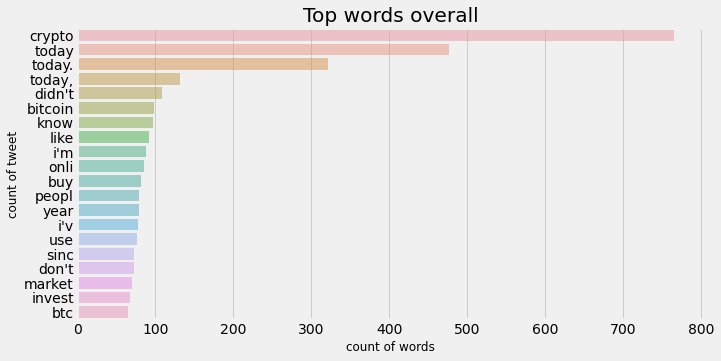

In [28]:
df=df[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values,df.index,alpha=0.5)
plt.title('Top words overall')
plt.xlabel('count of words',fontsize=12)
plt.ylabel('count of tweet',fontsize=12)
plt.show()